In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

In [2]:
# Importing Medicare data
medicare_data_df = pd.read_csv("Data\Medicare_Telehealth_Trends_Q1_2023.csv")
medicare_data_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2023,1,Wyoming,Medicare Only,All,All,All,All,All,57582.0,87532.0,3976.0,0.0690
1,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765
2,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
3,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
4,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860


In [3]:
#Checking where NaN values come from
medicare_data_df.loc[medicare_data_df["Total_Bene_TH_Elig"].isna()].groupby(["Bene_Race_Desc","Bene_RUCA_Desc"]).count()

Year  quarter  Bene_Geo_Desc  \
Bene_Race_Desc                Bene_RUCA_Desc                                 
All                           All               16       16             16   
                              Rural             16       16             16   
                              Unknown          864      864            864   
American Indian/Alaska Native All                8        8              8   
                              Unknown           16       16             16   
Asian/Pacific Islander        Unknown           16       16             16   
Black/African American        Unknown           16       16             16   
Hispanic                      Unknown           16       16             16   
Non-Hispanic White            Unknown           16       16             16   
Other/Unknown                 All             1008     1008           1008   
                              Rural             16       16             16   
                              Unknown           16       16             16   
                              Urban             16       16             16   

                                              Bene_Mdcd_Mdcr_Enrl_Stus  \
Bene_Race_Desc                Bene_RUCA_Desc                             
All                           All                                   16   
                              Rural                                 16   
                              Unknown                              864   
American Indian/Alaska Native All                                    8   
                              Unknown                               16   
Asian/Pacific Islander        Unknown                               16   
Black/African American        Unknown                               16   
Hispanic                      Unknown                               16   
Non-Hispanic White            Unknown                               16   
Other/Unknown                 All                                 1008   
                              Rural                                 16   
                              Unknown                               16   
                              Urban                                 16   

                                              Bene_Sex_Desc  \
Bene_Race_Desc                Bene_RUCA_Desc                  
All                           All                        16   
                              Rural                      16   
                              Unknown                   864   
American Indian/Alaska Native All                         8   
                              Unknown                    16   
Asian/Pacific Islander        Unknown                    16   
Black/African American        Unknown                    16   
Hispanic                      Unknown                    16   
Non-Hispanic White            Unknown                    16   
Other/Unknown                 All                      1008   
                              Rural                      16   
                              Unknown                    16   
                              Urban                      16   

                                              Bene_Mdcr_Entlmt_Stus  \
Bene_Race_Desc                Bene_RUCA_Desc                          
All                           All                                16   
                              Rural                              16   
                              Unknown                           864   
American Indian/Alaska Native All                                 8   
                              Unknown                            16   
Asian/Pacific Islander        Unknown                            16   
Black/African American        Unknown                            16   
Hispanic                      Unknown                            16   
Non-Hispanic White            Unknown                            16   
Other/Unknown                 All    

In [4]:
# Cleaning up columns
cleaned_data = medicare_data_df.rename(columns={"Bene_Geo_Desc": "State", "Bene_Mdcd_Mdcr_Enrl_Stus": "Medicare/Medicaid","Bene_Race_Desc": "Race",
                                 "Bene_Sex_Desc": "Sex", "Bene_Mdcr_Entlmt_Stus":"Entitlement Status", "Bene_Age_Desc":"Age","Bene_RUCA_Desc":"Locality","Total_Bene_TH_Elig":"Total Telehealth-Eligible Users",
                                 "Total_PartB_Enrl":"Part B Enrollment","Total_Bene_Telehealth":"Telehealth Users","Pct_Telehealth":"Percent of Telehealth Users"}).dropna().reset_index(drop=True)
cleaned_data.head()

,Year,quarter,State,Medicare/Medicaid,Race,Sex,Entitlement Status,Age,Locality,Total Telehealth-Eligible Users,Part B Enrollment,Telehealth Users,Percent of Telehealth Users
0,2023,1,Wyoming,Medicare Only,All,All,All,All,All,57582.0,87532.0,3976.0,0.0690
1,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765
2,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
3,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
4,2023,1,Wyoming,All,Black/African American,All,All,All,All,263.0,462.0,33.0,0.1255


In [5]:
#Checking total counts by year
cleaned_data.groupby("Year").count()

,quarter,State,Medicare/Medicaid,Race,Sex,Entitlement Status,Age,Locality,Total Telehealth-Eligible Users,Part B Enrollment,Telehealth Users,Percent of Telehealth Users
Year,,,,,,,,,,,,
2020,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374,5374
2021,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380,5380
2022,5375,5375,5375,5375,5375,5375,5375,5375,5375,5375,5375,5375
2023,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074


In [6]:
#Separating National data from State data
national = cleaned_data.loc[(cleaned_data["State"] == "National") & (cleaned_data['quarter']!="Overall")]
state = cleaned_data.loc[(cleaned_data["State"] != "National") & (cleaned_data['quarter']!="Overall")]

<Axes: xlabel='Year,quarter'>

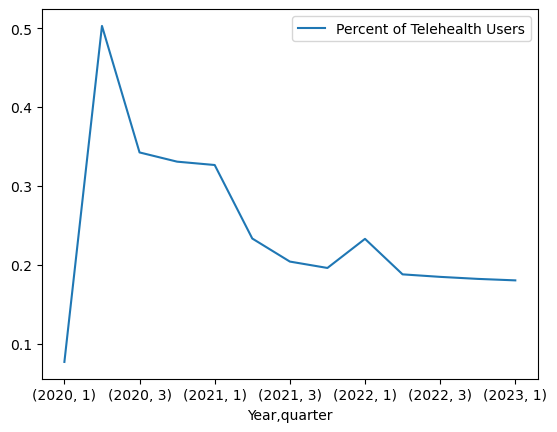

In [7]:
national[["Year","quarter","Percent of Telehealth Users"]].groupby(["Year","quarter"]).mean().plot()

In [8]:
# Narrowing down Sex column to just male and female
national_sex_data = national.loc[(national["Sex"] != "All") & (national["Medicare/Medicaid"] == "All") & 
                              (national["Race"] == "All") & (national["Entitlement Status"] == "All") &
                            (national["Age"] =="All") & (national["Locality"] == "All")] 

In [9]:
sex = national_sex_data.groupby("Sex")
sex2 = sex["Percent of Telehealth Users"].mean()

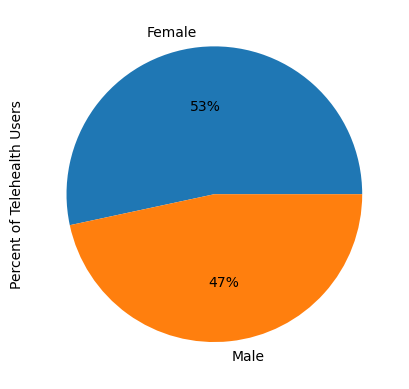

In [10]:
# Plotting Sex data into a pie chart
sex_pie = sex2.plot(kind="pie", y="Sex", autopct='%1.0f%%')

In [11]:
# Break down Locality to Urban and Rural
national_locality = national.loc[(national["Sex"] == "All") & (national["Medicare/Medicaid"] == "All") & 
                            (national["Race"] == "All") & (national["Entitlement Status"] == "All") &
                            (national["Age"] =="All") & (national["Locality"] != "All")]

In [12]:
locality = national_locality.groupby("Locality")
locality2 = locality["Percent of Telehealth Users"].mean()

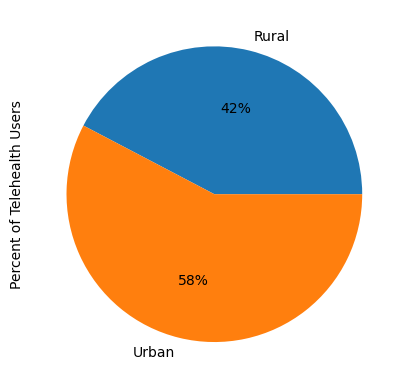

In [13]:
# Plot out Locality usage with a Pie Chart
locality_pie = locality2.plot(kind="pie", y="Sex", autopct='%1.0f%%')

In [14]:
# Break down Locality to Race Demographics
national_race = national.loc[(national["Sex"] == "All") & (national["Medicare/Medicaid"] == "All") & 
                            (national["Race"] != "All") & (national["Entitlement Status"] == "All") &
                            (national["Age"] =="All") & (national["Locality"] == "All")]

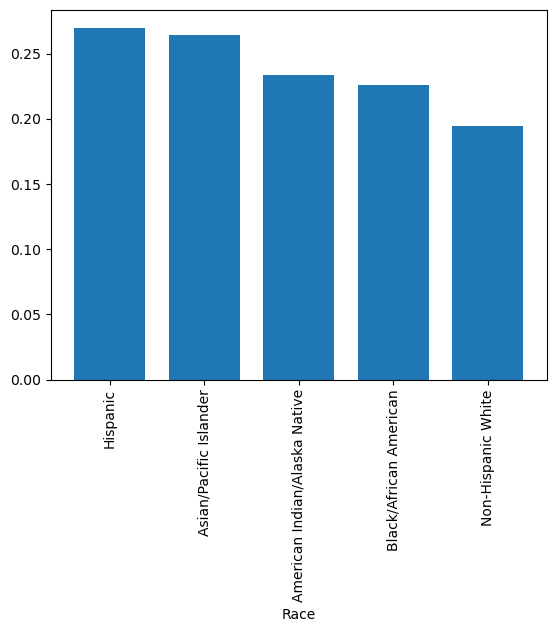

In [15]:
# Plot demographics into a bar chart
race = national_race.groupby("Race")
race2 = race["Percent of Telehealth Users"].mean()
race_bar = race2.sort_values(ascending=False).plot(kind="bar", width = .75)

In [16]:
# Break down Locality to Age
national_age = national.loc[(national["Sex"] == "All") & (national["Medicare/Medicaid"] == "All") & 
                            (national["Race"] == "All") & (national["Entitlement Status"] == "All") &
                            (national["Age"] !="All") & (national["Locality"] == "All")]

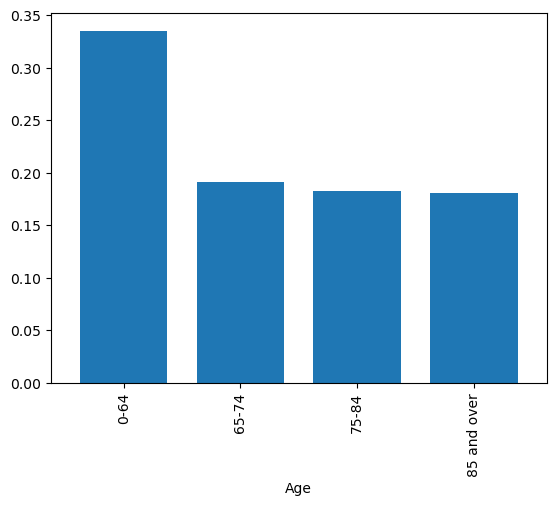

In [17]:
#Plot age into bar graph
age = national_age.groupby("Age")
age2 = age["Percent of Telehealth Users"].mean()
age_bar = age2.sort_values(ascending=False).plot(kind="bar", width = .75)